In [77]:
import pandas as pd
import numpy as np
from datetime import datetime as dtm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [8]:
iris = load_iris()
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

x = data1.iloc[:,:3]
y = data1.target

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)

In [84]:
import src.sk_ml; reload(src.sk_ml)
from src.sk_ml import *

In [11]:
models = sk_models(stoplist=())
params = cv_default_params()
df_cv_res = grid_cv_models(train_x, train_y, models, params, path='data/cross_validation/', redo=True)

2017-05-26 22:21:48.811000 CVing: kind = reg, model = DTreg
2017-05-26 22:21:52.765000 CVing: kind = reg, model = linearSVR
2017-05-26 22:21:56.915000 CVing: kind = reg, model = ADAreg
2017-05-26 22:22:06.703000 CVing: kind = reg, model = MLPreg
2017-05-26 22:22:12.082000 CVing: kind = reg, model = BAGreg
2017-05-26 22:22:23.388000 CVing: kind = reg, model = SVR
2017-05-26 22:22:32.356000 CVing: kind = reg, model = lasso
2017-05-26 22:22:36.402000 CVing: kind = reg, model = ridge
2017-05-26 22:22:40.644000 CVing: kind = reg, model = RFreg
2017-05-26 22:23:04.897000 CVing: kind = reg, model = ols
2017-05-26 22:23:09.043000 CVing: kind = reg, model = GDBreg


D:\Program Files\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:593: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


2017-05-26 22:23:14.330000 CVing: kind = cls, model = logistics
2017-05-26 22:23:18.284000 CVing: kind = cls, model = DTcls
2017-05-26 22:23:22.544000 CVing: kind = cls, model = SVM
2017-05-26 22:23:26.699000 CVing: kind = cls, model = linearSVM
2017-05-26 22:23:30.652000 CVing: kind = cls, model = MLPcls
2017-05-26 22:23:40.379000 CVing: kind = cls, model = ADAcls
2017-05-26 22:23:59.171000 CVing: kind = cls, model = GDBcls
2017-05-26 22:24:11.207000 CVing: kind = cls, model = GNBcls
2017-05-26 22:24:14.953000 CVing: kind = cls, model = RFcls
2017-05-26 22:24:39.664000 CVing: kind = cls, model = BAGcls
finished CV 2017-05-26 22:24:51.849000 0:03:03.038000


In [26]:
loaded_df_cv_res = grid_cv_models(train_x, train_y, models, params, path='data/cross_validation/', save_res=False)

loaded existing cv-ed best parameters


# prediction of some models such as MLPreg and LinearSVR is random

In [79]:
df_evl1 = evaluate_grid_cv(df_cv_res, train_x, train_y, test_x, test_y, evaluate_scalable_cls, path='data/cross_validation/', )
df_evl2 = evaluate_grid_cv(df_cv_res, train_x, train_y, test_x, test_y, evaluate_scalable_cls)

# loaded parameters of sklearn model works

In [29]:
df_evl_loaded = evaluate_grid_cv(loaded_df_cv_res, train_x, train_y, test_x, test_y, evaluate_scalable_cls)

In [45]:
a= (df_evl1.sort_index()/df_evl2.sort_index()).mean(axis=1)
a = a.to_frame()
b=(df_evl_loaded.sort_index()/df_evl.sort_index()).mean(axis=1)
a[1] = b
a.columns = ['two prediction', 'load/train']

In [47]:
a

two prediction  load/train
cls ADAcls           1.000000    1.000000
    BAGcls           0.919493    1.164125
    DTcls            1.170731    1.192731
    GDBcls           1.000000    1.000000
    GNBcls           1.000000    1.000000
    MLPcls                inf    1.105686
    RFcls            0.764476    1.196637
    SVM              1.000000    1.000000
    linearSVM        0.989115    1.042352
    logistics        1.000000    1.000000
reg ADAreg           1.114143    1.032892
    BAGreg           1.000670    0.988722
    DTreg            1.000000    1.000000
    GDBreg           0.995787    1.049106
    MLPreg           0.978467    0.977183
    RFreg            1.028753    1.005381
    SVR              1.000000    1.000000
    lasso            1.000000    1.000000
    linearSVR        0.999820    0.999984
    ols              1.000000    1.000000
    ridge            1.000000    1.000000

# Vis result

In [50]:
%matplotlib inline

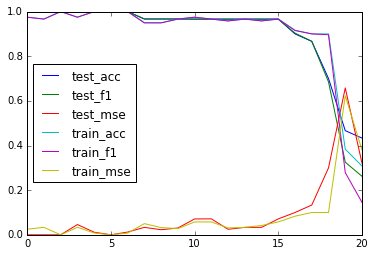

In [83]:
vis_evaluation('data/cross_validation/', 5)

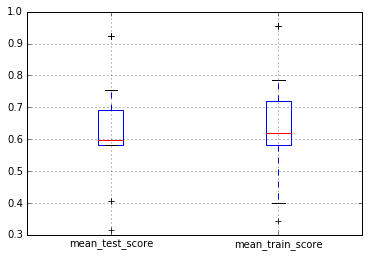

In [85]:
vis_grid_cv_one_model('data/cross_validation/cv_5_model_ADAcls.csv')